In [ ]:
# Install required libraries
!pip install kagglehub prophet scikit-learn matplotlib seaborn pandas numpy

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import kagglehub
import os


In [ ]:
# Download Rossmann dataset from Kaggle
path = kagglehub.dataset_download("pratyushakar/rossmann-store-sales")
print("Path to dataset files:", path)

# Check contents
os.listdir(path)


Using Colab cache for faster access to the 'rossmann-store-sales' dataset.
Path to dataset files: /kaggle/input/rossmann-store-sales


['store.csv', 'train.csv', 'test.csv']

In [ ]:
# Load main dataset
df = pd.read_csv(os.path.join(path, "train.csv"))
print("Shape:", df.shape)
df.head()


Shape: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Remove closed stores (Sales = 0)
df = df[df['Open'] == 1]

# Load store data
store_df = pd.read_csv(os.path.join(path, "store.csv"))

# Merge store data with train data
df = pd.merge(df, store_df, on='Store', how='left')

# Fill missing values
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
df['Promo'].fillna(0, inplace=True) # This line was already there, keeping it.

print(df.isnull().sum())
df.head()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
# Extract date-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Average monthly sales
monthly_sales = df.groupby(['Store', 'Year', 'Month'])['Sales'].mean().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
monthly_sales.head()


,Store,Year,Month,Sales,Date
0,1,2013,1,4939.653846,2013-01-01
1,1,2013,2,5219.625000,2013-02-01
2,1,2013,3,5806.760000,2013-03-01
3,1,2013,4,4720.360000,2013-04-01
4,1,2013,5,5140.217391,2013-05-01


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Month', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

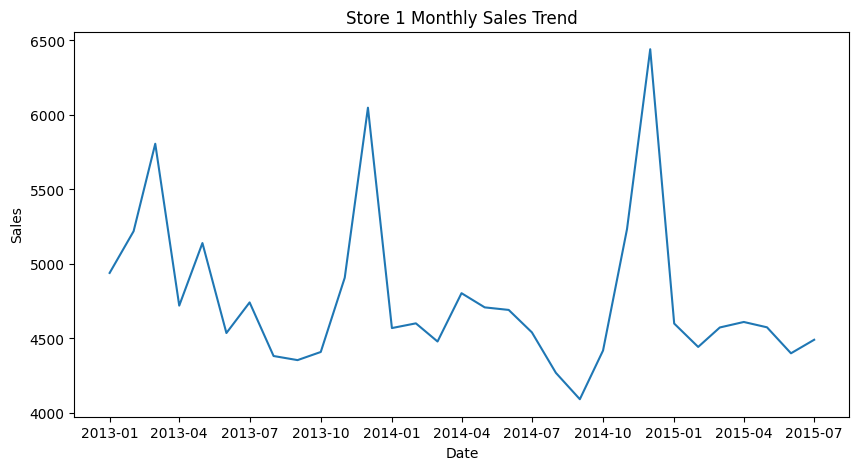

In [ ]:
# Select one store (e.g., Store 1)
store_id = 1
store_data = monthly_sales[monthly_sales['Store'] == store_id][['Date', 'Sales']]
store_data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(store_data['ds'], store_data['y'])
plt.title(f"Store {store_id} Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [ ]:
# Initialize and fit model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(store_data)

# Make future dataframe (12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjv_9miq/yecuxlzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjv_9miq/vtzu5ica.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8202', 'data', 'file=/tmp/tmptjv_9miq/yecuxlzj.json', 'init=/tmp/tmptjv_9miq/vtzu5ica.json', 'output', 'file=/tmp/tmptjv_9miq/prophet_modelzqlsqj_a/prophet_model-20251014192107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


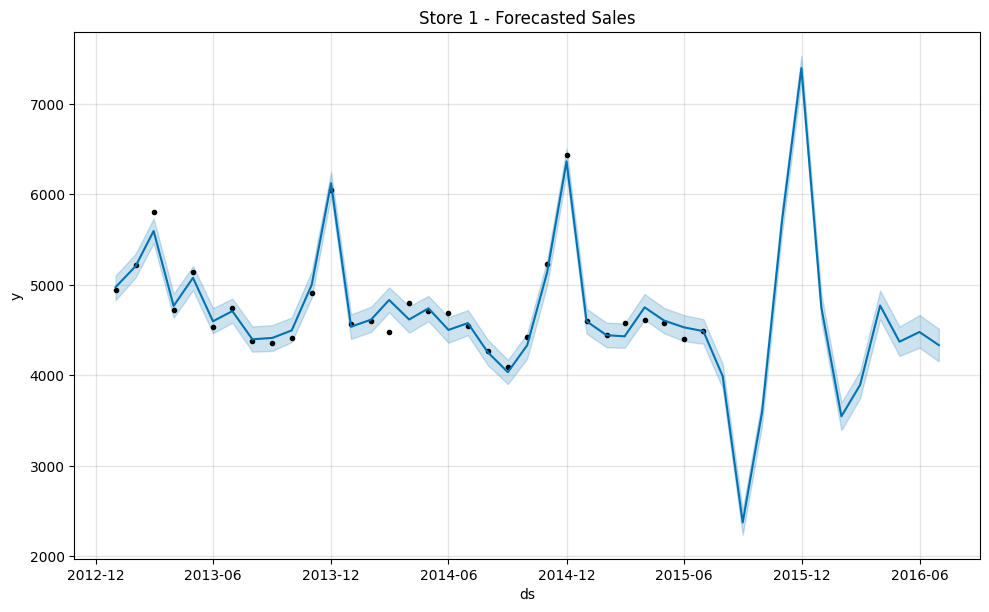

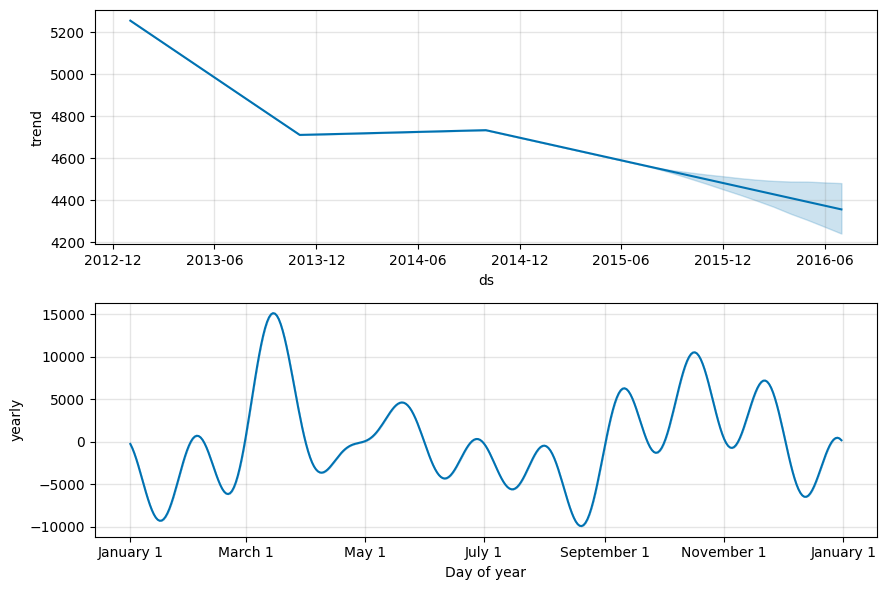

In [ ]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title(f"Store {store_id} - Forecasted Sales")
plt.show()

# Plot components (trend, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()


In [ ]:
# Merge forecast with actuals
actual = store_data.set_index('ds')
predicted = forecast.set_index('ds')[['yhat']].join(actual, how='inner')

# Calculate metrics
mae = mean_absolute_error(predicted['y'], predicted['yhat'])
rmse = np.sqrt(mean_squared_error(predicted['y'], predicted['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 77.81
RMSE: 108.49


In [ ]:
# Save to CSV (for Power BI)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("store_forecast.csv", index=False)
print("Forecast results saved as store_forecast.csv")


Forecast results saved as store_forecast.csv


In [ ]:
all_forecasts = []

for store_id in df['Store'].unique()[:10]:  # limit for demo
    data = monthly_sales[monthly_sales['Store'] == store_id][['Date', 'Sales']]
    data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)
    if len(data) < 24:  # skip small datasets
        continue
    model = Prophet(yearly_seasonality=True)
    model.fit(data)
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    forecast['Store'] = store_id
    all_forecasts.append(forecast[['ds', 'yhat', 'Store']])

final_forecast = pd.concat(all_forecasts)
final_forecast.to_csv("all_stores_forecast.csv", index=False)
print("Saved forecasts for multiple stores.")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjv_9miq/u7cvgzf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjv_9miq/xyze1t9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14497', 'data', 'file=/tmp/tmptjv_9miq/u7cvgzf_.json', 'init=/tmp/tmptjv_9miq/xyze1t9a.json', 'output', 'file=/tmp/tmptjv_9miq/prophet_modelzptsdglt/prophet_model-20251014192227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Saved forecasts for multiple stores.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')